In [ ]:
# !pip install --upgrade scikeras
# !pip show numpy

In [ ]:
# prompt: import  scikeras, keras and tensorflow, numpy,matplotlib

# !pip install scikeras
# !pip install pandas
# !pip install tensorflow
# !pip install keras
# !pip install numpy
# !pip install matplotlib
# !pip install missingno
# !pip install seaborn


In [ ]:
import keras.backend as K
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, MinMaxScaler
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split,GridSearchCV
from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import train_test_split


In [ ]:
# prompt: load  the train.csv and the test.csv files.sample(n=10000,random_state=37)
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
# Determine car year
# Calculate current year
current_year = datetime.now().year

# Calculate the age of the car
train['car_age'] = current_year - train['year']
test['car_age'] = current_year - test['year']
# Drop the original 'year' column
train.drop(columns=['year'], inplace=True)
test.drop(columns=['year'], inplace=True)


In [ ]:
# delete all rows with price of 0
train = train[train['price'] != 0]

In [ ]:
# Drop the id column
# train.drop(columns=['id'], inplace=True)

In [ ]:
# Convert string values in the 'kilometers' column to numerical values and return the maximum
def convert_to_max_kilometer(value):
    if isinstance(value, str):
        parts = value.split(' to ')
        if len(parts) == 1:  # Single value
            return int(parts[0])
        else:
            return int(parts[1])  # Maximum of the range
    else:
        return value

# Apply the function to each value in the 'kilometers' column
train['max_kilometer'] = train['kilometers'].apply(convert_to_max_kilometer)
test['max_kilometer'] = test['kilometers'].apply(convert_to_max_kilometer)

# Drop the original 'kilometers' column
train.drop(columns=['kilometers'], inplace=True)
test.drop(columns=['kilometers'], inplace=True)

In [ ]:
# Impute missing values for categorical features (e.g., body_type) with a new category 'unknown'
# Define a function to generate a random string
def generate_random_string(length=8):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for _ in range(length))

# train['body_type'].fillna('unknown', inplace=True)
# test['body_type'].fillna('unknown', inplace=True)
train['body_type'].fillna(generate_random_string(), inplace=True)
test['body_type'].fillna(generate_random_string(), inplace=True)

# Drop rows with more than three missing data fields
train.dropna(thresh=train.shape[1]-3, inplace=True)

# Step 2: Encode Categorical Variables
# Initialize LabelEncoder
label_encoders = {}

# Encode categorical variables with LabelEncoder
categorical_columns = ['brand', 'city', 'region', 'model', 'transmission_type','body_type' ]
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].transform(test[col])


train.drop('created_at_first', axis=1, inplace=True)
test.drop('created_at_first', axis=1, inplace=True)

In [ ]:
# Handle Outliers
# Identify and handle outliers in numerical features using winsorization
def handle_outliers(df, columns):
    for col in columns:
        # Calculate the 1st and 99th percentile
        p1 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)

        # Winsorization: Replace outliers with the nearest valid value within the percentile thresholds
        df[col] = df[col].clip(lower=p1, upper=p99)
    return df

In [ ]:
# Normalize/Scale Numerical Features
# Scale numerical features to a similar range using RobustScaler
def scale_numerical_features(df, columns):
    scaler = MinMaxScaler()  # Initialize RobustScaler RobustScaler()
    df[columns] = scaler.fit_transform(df[columns])  # Fit and transform the selected numerical features
    return df

In [ ]:
print(train)

            id  city  region  body_type  transmission_type  brand  model  \
0            1   276      25          0                  1     14     38   
1            2   239       3          2                  2     43      7   
2            3   222      17          3                  2     28     22   
3            4   251      18          6                  0      4     27   
4            5    12       6          2                  2     24     35   
...        ...   ...     ...        ...                ...    ...    ...   
766954  766955   209       6          6                  2     14     40   
766955  766956    99       6          6                  0      3      3   
766956  766957   117      16          6                  2      4     27   
766957  766958   196       1          6                  2     22     45   
766958  766959   300      23          1                  1      4     27   

         price  car_age  max_kilometer  
0       8900.0     23.0         9999.0  
1    

In [ ]:
# prompt: delete all rows in the car_age column with age that is above the 70percentiles but with a price that is above 50 percentiles


train = train.drop(train[(train['car_age'] > train['car_age'].quantile(0.65)) & (train['price'] > train['price'].quantile(0.5))].index)  #rmsle score: 0.35
# train = train.drop(train[(train['car_age'] > train['car_age'].quantile(0.55)) & (train['price'] > train['price'].quantile(0.5))].index) #rmsle score: 0.33
# train = train.drop(train[(train['car_age'] > train['car_age'].quantile(0.75)) & (train['price'] > train['price'].quantile(0.25))].index)  #rmsle score: 0.3005
#train = train.drop(train[(train['car_age'] > train['car_age'].quantile(0.55)) & (train['price'] > train['price'].quantile(0.5))].index)  #rmsle score: 0.263




In [ ]:


train = train.drop(train[(train['car_age'] < train['car_age'].quantile(0.3)) & (train['price'] < train['price'].quantile(0.35))].index)  #rmsle score: 0.35
# train = train.drop(train[(train['car_age'] < train['car_age'].quantile(0.55)) & (train['price'] < train['price'].quantile(0.35))].index) #rmsle score: 0.33
# train = train.drop(train[(train['car_age'] < train['car_age'].quantile(0.25)) & (train['price'] < train['price'].quantile(0.75))].index)  #rmsle score: 0.3005
#train = train.drop(train[(train['car_age'] < train['car_age'].quantile(0.55)) & (train['price'] < train['price'].quantile(0.35))].index) #rmsle score: 0.263



In [ ]:
# prompt: delete every row that has a max-kilometer that is wit delete all rows in the max-kilometers column if its value that is above the 70percentiles but with a price that is above 40 percentiles

train = train.drop(train[(train['max_kilometer'] > train['max_kilometer'].quantile(0.6)) & (train['price'] > train['price'].quantile(0.5))].index)  #rmsle score: 0.35
# train = train.drop(train[(train['max_kilometer'] > train['max_kilometer'].quantile(0.55)) & (train['price'] > train['price'].quantile(0.5))].index) #rmsle score: 0.33
# train = train.drop(train[(train['max_kilometer'] > train['max_kilometer'].quantile(0.25)) & (train['price'] > train['price'].quantile(0.75))].index)  #rmsle score: 0.3005
#train = train.drop(train[(train['max_kilometer'] > train['max_kilometer'].quantile(0.25)) & (train['price'] > train['price'].quantile(0.75))].index)  #rmsle score: 0.263



In [ ]:
# prompt: delete all rows in the max-kilometers column with value that is  within the 15 percentiles but with a price that is below 35 percentiles


train = train.drop(train[(train['max_kilometer'] < train['max_kilometer'].quantile(0.3)) & (train['price'] < train['price'].quantile(0.35))].index) #rmsle score: 0.35
# train = train.drop(train[(train['max_kilometer'] < train['max_kilometer'].quantile(0.55)) & (train['price'] < train['price'].quantile(0.35))].index) #rmsle score: 0.33
# train = train.drop(train[(train['max_kilometer'] < train['max_kilometer'].quantile(0.75)) & (train['price'] < train['price'].quantile(0.25))].index) #rmsle score: 0.3005
#train = train.drop(train[(train['max_kilometer'] < train['max_kilometer'].quantile(0.75)) & (train['price'] < train['price'].quantile(0.25))].index) #rmsle score: 0.263

In [ ]:
# List of numerical columns to handle outliers and scale
numerical_columns = ['max_kilometer', 'car_age', 'price']  # Assuming these are the numerical features

# Handle outliers
train = handle_outliers(train, numerical_columns)

# Normalize/Scale Numerical Features
scaler = MinMaxScaler()
train[numerical_columns] = scaler.fit(train[numerical_columns])
train = scaler.transform(train)

[columns] = scaler.fit_transform(df[columns])
# test = scaler.transform(test)
# train = scale_numerical_features(train, ['max_kilometer', 'car_age',])
# test = scale_numerical_features(test, ['max_kilometer', 'car_age',])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

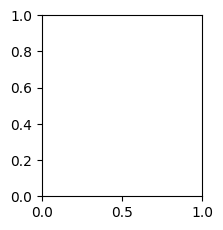

In [ ]:
# Calculate correlation between each feature and the target variable (price)
correlation_with_price = train.corrwith(train['price']).sort_values(ascending=False)

# Plot each column against the price
plt.figure(figsize=(12, 8))
for i, col in enumerate(correlation_with_price.index):
    plt.subplot(3, 5, i + 1)
    plt.scatter(train[col], train['price'], alpha=0.5)
#     plt.title(f'{col} vs. price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = train.corr()

# Extract the correlation of each feature with the target variable (price)
feature_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)

# Print the most correlated features
print("Most correlated features with price:")
print(feature_correlation)

In [ ]:

def rmsle(y_true, y_pred):
    """
    Compute Root-Mean-Squared-Logarithmic-Error (RMSLE) loss between y_true and y_pred.
    """
    # squared_log_error = tf.square(tf.math.log(y_true + 1) - tf.math.log(y_pred + 1))
    # mean_squared_log_error = tf.reduce_mean(squared_log_error, axis=-1)
    # return tf.sqrt(mean_squared_log_error)
    assert len(y_true) == len(y_pred), "Lengths of true and predicted values must match"

    # Transform true and predicted values using natural logarithm
    y_true_log = np.log1p(y_true)
    y_pred_log = np.log1p(y_pred)

    # Compute squared log error
    squared_log_error = (y_true_log - y_pred_log) ** 2

    # Compute mean squared log error and take square root
    mean_squared_log_error = np.mean(squared_log_error)
    rmsle = np.sqrt(mean_squared_log_error)

    return rmsle


# Use RMSLE as the loss function when compiling the model

In [ ]:
# Define the neural network architecture
def create_model():
    model = Sequential([
        # Input layer with four neurons
        Dense(16, input_shape=(4,), activation='relu'),  # 16 neurons in the hidden layer
        # Output layer with a single neuron for regression
        Dense(1, activation='linear')  # Linear activation for regression
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # model.compile(optimizer="adam", loss=rmsle)
    return model

In [ ]:
# Create an instance of the KerasRegressor wrapper with the defined model

keras_regressor = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=1)

In [ ]:
# Prepare the input features (X_train) and target variable (y_train)
train.fillna(train.mean(),inplace=True)

X = train[['car_age', 'transmission_type', 'max_kilometer','body_type']]
y = train['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Fit the model to the training data
keras_regressor.fit(X_train,y_train)
print("Validation set shape:", X_val.shape, y_val.shape)


In [ ]:
# Assuming X_val and y_val are the validation set
# Check for missing values in the validation data

# print("\nNo missing values found in the data.")
# score = keras_regressor.score(X_val, y_val)
# print("Validation Set Score:", score)
sns.scatterplot(x=y_val,y=y_val)
data = keras_regressor.predict(X_val)
sns.scatterplot(y= data,x = y_val, label=f'rmsle score: {np.sqrt(np.mean(np.square(np.log1p(y_val) - np.log1p(data))))}')

In [ ]:
# Get predictions on the validation set
mse_predictions = keras_regressor.predict(X_val)

# Extract true values from the validation set
true_values = y_val.values

# Compute RMSLE
rmsle_score = rmsle(true_values, mse_predictions)
print("RMSLE Score:", rmsle_score)

# Calculate RMSLE
rmsle = np.sqrt(np.mean(np.square(np.log1p(y_val) - np.log1p(mse_predictions))))
print("RMSLE on Validation Set: %.4f" % rmsle)

In [ ]:
# Obtain predictions for the test data
predictions = keras_regressor.predict(test[['car_age', 'transmission_type', 'max_kilometer','body_type']])

# Combine predictions with corresponding IDs
predicted_prices = pd.DataFrame({'id': test['id'], 'price': predictions})
print(predicted_prices)
# Export the DataFrame to a CSV file
predicted_prices.to_csv('submission.csv', index=False, mode='w')
# predictions = keras_regressor.predict(X_test)